In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm, linregress
import tools #You'll find this file in the github

In [9]:
statistics = {'all': {'a': 2.542562886886376,
  'loc': -1.114525560819975,
  'scale': 1.4973819434202296,
  'CV': 0.41696167189340216,
  'n': 33539},}

LinregressResult(slope=0.7477832735694019, intercept=0.003805183831187775, rvalue=0.9999857507701947, pvalue=0.0, stderr=0.00010676711198842541, intercept_stderr=0.00012742170619779237)

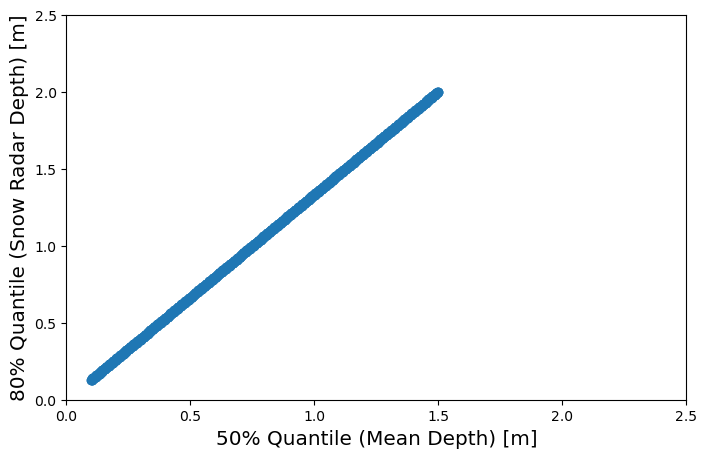

In [12]:
tiny_bin_edges = np.arange(0,5,0.01)

mean_depths = np.arange(0.1,1.5,0.001)

quan80 = []

for mean_depth in mean_depths:

    bc, ft = tools.depth_distribution_from_depth(mean_depth,tiny_bin_edges,statistics=statistics['all'])
    
    # Calculate Lognormal distribution based on some mean depth

    thresh80arg = np.argmax(np.cumsum(ft)>0.8) #Calculate index of 80% quantile; You could set another number here (90%,75%, whatever)
    
    thresh80dep = tiny_bin_edges[thresh80arg] #Convert index to snow depth
    
    quan80.append( thresh80dep )
    
fig, ax1 = plt.subplots(1,1,figsize=(8,5))    

ax1.scatter(mean_depths,quan80)
ax1.set_xlabel('50% Quantile (Mean Depth) [m]',fontsize='x-large')
ax1.set_ylabel('80% Quantile (Snow Radar Depth) [m]',fontsize='x-large')
ax1.set_ylim(0,2.5)
ax1.set_xlim(0,2.5)
lr = linregress(quan80,mean_depths)
lr